In [3]:
from finvizfinance.screener.overview import Overview
import pandas as pd
from finvizfinance.quote import finvizfinance
import yfinance as yf
import numpy as np
import pickle
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [212]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d} ({p:.2f}%)'.format(p=pct,v=val)
    return my_autopct

# Introduzione

Il mio approccio al trading si basa su 3 pilastri fondamentali:
1. Specializzazione.
2. Dinamiche a valore atteso positivo nel lungo termine.
3. Aggiornamento costante delle statistiche di queste dinamiche.

In questo Notebook utilizzerò Python ed alcune sue librerie per verificare le statistiche di una dinamica in particolare.

# Dinamica

Mi interesso in questo caso di azioni con:

- Gap Minimo >= 70%
- Prezzo di Open >= 3$
- Volume di Pre Market >=5M
- Volume totale di giornata>=25M
- Market Cap <= 500M
- Flottante >= 1M


# Domanda

In questa situazione quante volte il prezzo di un'azione chiude sotto l'open?

Prima di rispondere a questa domanda è opportuno ricavarsi alcuni dati e fare un po' di data manipulation.

Userò a questo scopo le librerie:
- finvizfinance
- yfinance

Utilizzando finvizfinance otterrò i ticker di azioni che soddisfano le condizioni di marketcap e flottante, mentre yfinance mi permetterà di scaricare lo storico dei prezzi, volumi, open, ecc...

In [129]:
foverview = Overview()

In [130]:
foverview.get_filters()

['Exchange',
 'Index',
 'Sector',
 'Industry',
 'Country',
 'Market Cap.',
 'P/E',
 'Forward P/E',
 'PEG',
 'P/S',
 'P/B',
 'Price/Cash',
 'Price/Free Cash Flow',
 'EPS growththis year',
 'EPS growthnext year',
 'EPS growthpast 5 years',
 'EPS growthnext 5 years',
 'Sales growthpast 5 years',
 'EPS growthqtr over qtr',
 'Sales growthqtr over qtr',
 'Dividend Yield',
 'Return on Assets',
 'Return on Equity',
 'Return on Investment',
 'Current Ratio',
 'Quick Ratio',
 'LT Debt/Equity',
 'Debt/Equity',
 'Gross Margin',
 'Operating Margin',
 'Net Profit Margin',
 'Payout Ratio',
 'InsiderOwnership',
 'InsiderTransactions',
 'InstitutionalOwnership',
 'InstitutionalTransactions',
 'Float Short',
 'Analyst Recom.',
 'Option/Short',
 'Earnings Date',
 'Performance',
 'Performance 2',
 'Volatility',
 'RSI (14)',
 'Gap',
 '20-Day Simple Moving Average',
 '50-Day Simple Moving Average',
 '200-Day Simple Moving Average',
 'Change',
 'Change from Open',
 '20-Day High/Low',
 '50-Day High/Low',
 '52

# Filtro

Mi interessano soltanto azioni che abbiano almeno 1M di flottante, questo per diminuire le probabilità che i venditori allo scoperto possano rimanere incastrati e dover chiudere le loro posizioni.

In [131]:
filters_dict = {'Float' :'Over 1M'}
foverview.set_filter(filters_dict=filters_dict)

In [132]:
df = foverview.screener_view()
df.head()

KeyboardInterrupt: 

Esporto

In [24]:
df.to_csv('finvizfull.csv', index=False)

Importo

In [28]:
file_path='finvizfull.csv'
df = pd.read_csv(file_path)

In [29]:
df

,Ticker\n\n,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,A,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,USA,3.547000e+10,31.94,121.91,0.0069,840682.0
1,AA,Alcoa Corporation,Basic Materials,Aluminum,USA,5.370000e+09,NaN,31.10,0.0339,5973963.0
2,AAC,Ares Acquisition Corporation,Financial,Shell Companies,USA,7.548200e+08,NaN,10.69,0.0000,29644.0
3,AACG,ATA Creativity Global,Consumer Defensive,Education & Training Services,China,3.920000e+07,NaN,1.26,0.0161,2867.0
4,AACI,Armada Acquisition Corp. I,Financial,Shell Companies,USA,8.495000e+07,NaN,10.54,-0.0186,38987.0
...,...,...,...,...,...,...,...,...,...,...
6116,ZVSA,"ZyVersa Therapeutics, Inc.",Healthcare,Biotechnology,USA,4.390000e+06,NaN,0.14,-0.0120,323528.0
6117,ZWS,Zurn Elkay Water Solutions Corporation,Industrials,Pollution & Treatment Controls,USA,5.120000e+09,113.60,29.65,0.0010,561496.0
6118,ZYME,Zymeworks Inc.,Healthcare,Biotechnology,Canada,4.911200e+08,2.68,7.49,0.0345,254674.0
6119,ZYNE,"Zynerba Pharmaceuticals, Inc.",Healthcare,Drug Manufacturers - Specialty & Generic,USA,7.170000e+07,NaN,1.32,-0.0075,670034.0


In [30]:
df.columns

Index(['Ticker\n\n', 'Company', 'Sector', 'Industry', 'Country', 'Market Cap',
       'P/E', 'Price', 'Change', 'Volume'],
      dtype='object')

# MarketCap

Mi interessano solo azioni con marketcap <=500M

In [31]:
df_low_mc = df[(df['Market Cap']<=5e+08)]

Estraggo i tickers.

In [32]:
tickers = df_low_mc['Ticker\n\n']

Verifico presenza di NaN ed elimino.

In [33]:
tickers.isna().sum()

1

In [34]:
tickers=tickers.dropna()

In [35]:
tickers = tickers.to_numpy()

In [36]:
tickers

array(['AACG', 'AACI', 'AADI', ..., 'ZYME', 'ZYNE', 'ZYXI'], dtype=object)

# Variabili

- data1d è lo storico del prezzo dato un ticker, dove ogni riga rappresenta un giorno dell'anno.

- data1h è lo storico del prezzo di un ticker ma aumento la granularità, infatti ogni riga rappresenta un'ora di un giorno.

- volume_pm è il volume premarket.

- gap_cond è la condizione sul gap.

- red-cond è la condizione di chiusura della giornata sotto l'open.

- volume_cond è la condizione del volume minimo registrato durante la giornata.

- volume_pm_cond è la condizione sul volume di premarket.

- open_price_cond è la condizione sul prezzo di open.

- gap_len conta quante volte si è verificata la dinamica.

- red_len conta quante volte, verificatasi la dinamica, la chiusura è stata sotto l'open di giornata.

- dizionario ha per chiave il ticker e come valori una coppia di valori che mi indicano quante volte per quel ticker si è verificata la dinamica, e quante volte, verificatasi la dinamica, ha chiuso red.

In [211]:
dizionario={}
start_date = "2023-01-01"
end_date = "2023-09-06"

for ticker in tickers:
    data1d = yf.download(ticker,start = start_date, end = end_date)
    data1h = yf.download(ticker,start = start_date, end = end_date, interval='1h')
    volume_pm = data1h.groupby(data1h.index.date).first()['Volume']
    data1d['Gap'] = ((data1d['Open'] - data1d['Close'].shift(1)) / data1d['Close'].shift(1))
    data1d['Volume_pm'] = volume_pm
    gap_cond = data1d['gap'] >= 0.7
    red_cond = data1d['Close'] < data1d['Open']
    volume_cond = data1d['Volume'] >= 25e6
    volume_pm_cond = data1d['Volume_pm']>=5e6
    open_price_cond = data1d['Open'] >=3
    days_gap = data1d.index[gap_cond & volume_cond &volume_pm_cond & open_price_cond].strftime("%Y-%m-%d").tolist()
    gap_len = len(days_gap)
    days_gap_red = data1d.index[gap_cond & red_cond & volume_cond & open_price_cond].strftime("%Y-%m-%d").tolist()
    red_len = len(days_gap_red)
    dizionario[ticker] = red_len, gap_len

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [213]:
len(dizionario.items())

3011

In [214]:
dizionario.items()

dict_items([('AACG', (0, 0)), ('AACI', (0, 0)), ('AADI', (0, 0)), ('AAIC', (0, 0)), ('AAME', (0, 0)), ('AAN', (0, 0)), ('AAOI', (0, 0)), ('AAU', (0, 0)), ('ABEO', (0, 0)), ('ABIO', (0, 0)), ('ABLV', (0, 0)), ('ABOS', (1, 1)), ('ABSI', (0, 0)), ('ABUS', (0, 0)), ('ABVC', (0, 0)), ('ACAB', (0, 0)), ('ACAC', (0, 0)), ('ACAX', (0, 0)), ('ACB', (0, 0)), ('ACBA', (0, 0)), ('ACER', (0, 0)), ('ACET', (0, 0)), ('ACHL', (0, 0)), ('ACHV', (0, 0)), ('ACIC', (0, 0)), ('ACIU', (0, 0)), ('ACNB', (0, 0)), ('ACNT', (0, 0)), ('ACON', (0, 0)), ('ACOR', (0, 0)), ('ACP', (0, 0)), ('ACR', (0, 0)), ('ACRO', (0, 0)), ('ACRV', (0, 0)), ('ACRX', (0, 0)), ('ACST', (0, 0)), ('ACTG', (0, 0)), ('ACU', (0, 0)), ('ACV', (0, 0)), ('ACXP', (0, 0)), ('ADAG', (0, 0)), ('ADAP', (0, 0)), ('ADCT', (0, 0)), ('ADD', (0, 0)), ('ADER', (0, 0)), ('ADES', (0, 0)), ('ADEX', (0, 0)), ('ADIL', (0, 0)), ('ADMP', (0, 0)), ('ADN', (0, 0)), ('ADOC', (0, 0)), ('ADRT', (0, 0)), ('ADSE', (0, 0)), ('ADTH', (0, 0)), ('ADVM', (0, 0)), ('ADXN'

Salvo il dizionario

In [233]:
name_file = 'dict.pkl'
with open(name_file, 'wb') as file:
    pickle.dump(dizionario, file)

In [4]:
name_file = 'dict.pkl'
with open(name_file, 'rb') as file:
    dizionario = pickle.load(file)

Mi interesso soltanto dei tickers per cui la dinamica si è verificata almeno una volta, e verifico se esiste un ticker per cui la dinamica si è verificata almeno 2 volte.

In [5]:
fav = 0
total = 0
tickers_fav = []
double_ticker = []
for ticker,valori in dizionario.items():
    fav_ticker,total_ticker = valori
    fav += fav_ticker
    total += total_ticker
    if total_ticker>0:
        tickers_fav.append(ticker)
    if total_ticker>1:
        double_ticker.append(ticker)

In [6]:
tickers_fav

['ABOS',
 'ASST',
 'AUGX',
 'BAER',
 'BBAI',
 'BDTX',
 'BLPH',
 'BMR',
 'BXRX',
 'CDIO',
 'CFRX',
 'CWBR',
 'CXAI',
 'CYTO',
 'DCTH',
 'DRMA',
 'ELEV',
 'ENSC',
 'FRTX',
 'GDC',
 'GNS',
 'HCTI',
 'HOTH',
 'HOUR',
 'JZXN',
 'LIPO',
 'LUCY',
 'MEGL',
 'MSGM',
 'NBTX',
 'OCEA',
 'OTRK',
 'QH',
 'SAI',
 'SECO',
 'SIEN',
 'SNGX',
 'SNTG',
 'SPRB',
 'TENX',
 'THMO',
 'TIVC',
 'UCAR',
 'VTGN']

In [7]:
len(tickers_fav)

44

Soltanto su DRMA si è verificata la dinamica 2 volte.

In [8]:
double_ticker

['DRMA']

In [9]:
fav

34

In [10]:
total

45

In [11]:
fav/total

0.7555555555555555

# Statistica

Come possiamo vedere, a partire dal 1 Gennaio 2023, su 45 volte in cui l'azione (con tutte le caratteristiche elencate prima) ha aperto con un gap >= del 70% ha chiuso sotto l'open 34 volte.

In [25]:
labels = ['Below open', 'Above open']
values = [fav, total-fav]

In [26]:
def my_fmt(x):
    print(x)
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)

75.55555701255798
24.444444477558136


Text(0.5, 1.0, 'Pie Chart Statistica di stocks con:\nFloat>=1M\nGap>=70%\nPrezzo di Open >=3$\nVolume Pre Market>=5M\nVolume totale giornata>=25M\nMarketCap<=500M')

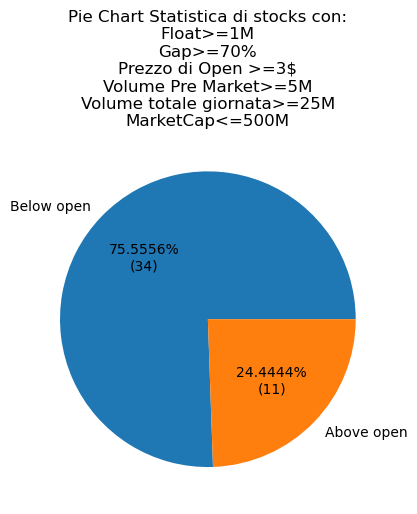

In [27]:
#plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.pie(values, labels=labels, autopct=my_fmt)
plt.title('Pie Chart Statistica di stocks con:\nFloat>=1M\nGap>=70%\nPrezzo di Open >=3$\nVolume Pre Market>=5M\nVolume totale giornata>=25M\nMarketCap<=500M')


# Domanda

 Tra le 45 volte in cui si verifica questa dinamica, quante volte il prezzo ha superato il massimo di Pre Market?
 
 Per rispondere a questa domanda mi servono anche i dati di premarket, che posso ottenere sempre grazie a yfinance.

# ABOS

Faccio un test prima su ABOS per vedere cosa succede.
Come prima mi interesso dei dati a partire dal 1 gennaio 2023.

In [122]:
start_date = "2023-01-01"
end_date = "2023-09-06"

In [123]:
abos_df = yf.download("ABOS",start = start_date, end = end_date)
abos_df1h = yf.download("ABOS",start = start_date, end = end_date, interval='1h')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Calcolo il volume premarket,il gap e le condizioni che mi servono.

In [124]:
volume_pm = abos_df1h.groupby(abos_df1h.index.date).first()['Volume']
abos_df['Gap'] = ((abos_df['Open'] - abos_df['Close'].shift(1)) / abos_df['Close'].shift(1))
abos_df['Volume_pm'] = volume_pm
gap_cond = abos_df['Gap'] >= 0.7
volume_cond = abos_df['Volume'] >= 25e6
volume_pm_cond = abos_df['Volume_pm']>=5e6
open_price_cond = abos_df['Open'] >=3

In [125]:
abos_df_total = abos_df[gap_cond & volume_cond & volume_pm_cond & open_price_cond] 

Questo è il giorno in cui l'azione ha aperto in gap >= 70%.

In [126]:
abos_df_total

,Open,High,Low,Close,Adj Close,Volume,Gap,Volume_pm
Date,,,,,,,,
2023-07-17,11.01,11.31,9.26,9.72,9.72,29215900,0.753185,19406155


Estraggo i giorni in cui tutte le condizioni si sono verificate.

In [127]:
date = abos_df_total.index.strftime("%Y-%m-%d").values

Scarico i prezzi per quel giorno con intervallo 1h per poter dedurre il massimo di premarket.

In [128]:
abos_df1m = yf.download("ABOS",start = date[0], interval='1h',prepost=True)

[*********************100%%**********************]  1 of 1 completed


In [129]:
abos_df1m_day = abos_df1m[abos_df1m.index.strftime("%Y-%m-%d").isin(date)]

Ottengo il prezzo del giorno d'interesse (potrebbero essere anche di più).

In [130]:
abos_df1m_day

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-07-17 04:00:00-04:00,7.2600,9.8200,6.59,8.7000,8.7000,0
2023-07-17 05:00:00-04:00,8.7400,9.2300,8.32,8.9400,8.9400,0
2023-07-17 06:00:00-04:00,8.9100,9.1600,8.25,8.5800,8.5800,0
2023-07-17 07:00:00-04:00,8.5800,9.6900,8.52,9.3600,9.3600,0
2023-07-17 08:00:00-04:00,9.3900,14.0000,7.02,12.1515,12.1515,0
2023-07-17 09:00:00-04:00,12.1800,12.9600,11.00,11.1200,11.1200,0
2023-07-17 09:30:00-04:00,11.0100,11.3099,9.48,9.8000,9.8000,19406155
2023-07-17 10:30:00-04:00,9.7999,9.9500,9.26,9.8850,9.8850,2010923
2023-07-17 11:30:00-04:00,9.8850,10.7500,9.67,10.2300,10.2300,2546515


In [131]:
open_time = datetime.strptime('09:30:00', '%H:%M:%S')
premarket_abos = abos_df1m_day[abos_df1m_day.index.time<open_time.time()]

Ottengo il premarket (osservazione:ottengo solo 1 giorno, ma potrebbero esseci situazioni in cui questa dinamica si verifichi in diversi giorni durante l'anno, è necessario quindi fare un group_by sui giorni per determinare il massimo di premarket).

In [132]:
premarket_abos

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-07-17 04:00:00-04:00,7.26,9.82,6.59,8.7000,8.7000,0
2023-07-17 05:00:00-04:00,8.74,9.23,8.32,8.9400,8.9400,0
2023-07-17 06:00:00-04:00,8.91,9.16,8.25,8.5800,8.5800,0
2023-07-17 07:00:00-04:00,8.58,9.69,8.52,9.3600,9.3600,0
2023-07-17 08:00:00-04:00,9.39,14.00,7.02,12.1515,12.1515,0
2023-07-17 09:00:00-04:00,12.18,12.96,11.00,11.1200,11.1200,0


In [133]:
high_pm = premarket_abos.groupby(premarket_abos.index.date)['High'].max()

Ottengo il massimo di premarket.

In [134]:
high_pm

2023-07-17    14.0
Name: High, dtype: float64

In [135]:
abos_df_total['High_pm'] = high_pm
abos_df_total

C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3970827615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abos_df_total['High_pm'] = high_pm


,Open,High,Low,Close,Adj Close,Volume,Gap,Volume_pm,High_pm
Date,,,,,,,,,
2023-07-17,11.01,11.31,9.26,9.72,9.72,29215900,0.753185,19406155,14.0


Applico a tutti i ticker in cui osservo questa dinamica.

In [136]:
start_date = "2023-01-01"
end_date = "2023-09-06"
count = 0
tickers_break= []
for ticker in tickers_fav:
    ticker_df = yf.download(ticker,start = start_date, end = end_date)
    ticker_df1h = yf.download(ticker,start = start_date, end = end_date, interval='1h')
    volume_pm = ticker_df1h.groupby(ticker_df1h.index.date).first()['Volume']
    ticker_df['Gap'] = ((ticker_df['Open'] - ticker_df['Close'].shift(1)) / ticker_df['Close'].shift(1))
    ticker_df['Volume_pm'] = volume_pm
    gap_cond = ticker_df['Gap'] >= 0.7
    volume_cond = ticker_df['Volume'] >= 25e6
    volume_pm_cond = ticker_df['Volume_pm']>=5e6
    open_price_cond = ticker_df['Open'] >=3
    ticker_df_total = ticker_df[gap_cond & volume_cond & volume_pm_cond & open_price_cond]
    date = ticker_df_total.index.strftime("%Y-%m-%d").values
    ticker_df1m = yf.download(ticker,start = date[0], interval='1h',prepost=True)
    ticker_df1m_day = ticker_df1m[ticker_df1m.index.strftime("%Y-%m-%d").isin(date)]
    open_time = datetime.strptime('09:30:00', '%H:%M:%S')
    premarket_ticker = ticker_df1m_day[ticker_df1m_day.index.time<open_time.time()]
    high_pm = premarket_ticker.groupby(premarket_ticker.index.date)['High'].max()
    ticker_df_total['High_pm'] = high_pm
    count = count + (ticker_df_total['High'].values > ticker_df_total['High_pm'].values).sum()
    #aumentare count in questo modo mi permette di considerare anche il caso in cui per un ticker si sia verificata la dinamica più di una volta
    if (ticker_df_total['High'].values > ticker_df_total['High_pm'].values).sum() > 0:
        tickers_break.append(ticker)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2534989042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm


In [137]:
count

27

In [138]:
total

45

In tickers_break ho tutti i tickers di azioni che hanno rotto il massimo di pre apertura.

In [139]:
tickers_break

['ASST',
 'BAER',
 'BBAI',
 'BDTX',
 'BLPH',
 'BMR',
 'BXRX',
 'CDIO',
 'CFRX',
 'CWBR',
 'DRMA',
 'ELEV',
 'ENSC',
 'GDC',
 'HCTI',
 'HOTH',
 'LUCY',
 'MSGM',
 'OCEA',
 'OTRK',
 'QH',
 'SAI',
 'SECO',
 'SNTG',
 'SPRB',
 'UCAR']

# Statistica

Come possiamo vedere su 45 volte in cui si verifica questa dinamica, 27 volte il prezzo rompe il massimo di premarket.

In [159]:
def my_fmt(x):
    print(x)
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)

60.00000238418579
40.00000059604645


Text(0.5, 1.0, 'Dopo aver aperto con un gap maggiore del 70%, quante volte ha rotto il massimo di premarket?')

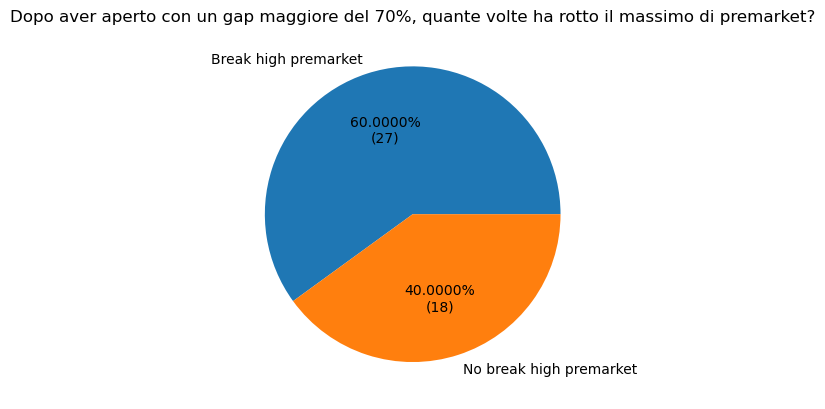

In [160]:
labels = ['Break high premarket', 'No break high premarket']
values = [count, total-count]
plt.pie(values, labels=labels, autopct=my_fmt)
plt.title("Dopo aver aperto con un gap maggiore del 70%, quante volte ha rotto il massimo di premarket?")


# Domanda

Di queste 27 volte che un'azione ha superato il massimo di pre apertura, considero quelle che l'hanno rotto entro la prima ora.

Quante di queste hanno chiuso la giornata sotto l'open?

# ABOS

Ripercorro i passi di prima senza commentarli.

In [173]:
start_date = "2023-01-01"
end_date = "2023-09-06"

In [174]:
abos_df = yf.download("ABOS",start = start_date, end = end_date)
abos_df1h = yf.download("ABOS",start = start_date, end = end_date, interval='1h')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [175]:
volume_pm = abos_df1h.groupby(abos_df1h.index.date).first()['Volume']
abos_df['Gap'] = ((abos_df['Open'] - abos_df['Close'].shift(1)) / abos_df['Close'].shift(1))
abos_df['Volume_pm'] = volume_pm
gap_cond = abos_df['Gap'] >= 0.7
red_cond = abos_df['Close'] < abos_df['Open']
volume_cond = abos_df['Volume'] >= 25e6
volume_pm_cond = abos_df['Volume_pm']>=5e6
open_price_cond = abos_df['Open'] >=3

In [176]:
abos_df_total = abos_df[gap_cond & volume_cond & volume_pm_cond & open_price_cond ] 

In [177]:
date = abos_df_total.index.strftime("%Y-%m-%d").values

In [178]:
abos_df1m = yf.download("ABOS",start = date[0], interval='1h',prepost=True)

[*********************100%%**********************]  1 of 1 completed


In [179]:
abos_df1m_day = abos_df1m[abos_df1m.index.strftime("%Y-%m-%d").isin(date)]

In [180]:
open_time = datetime.strptime('09:30:00', '%H:%M:%S')
premarket_abos = abos_df1m_day[abos_df1m_day.index.time<open_time.time()]

In [181]:
high_pm = premarket_abos.groupby(premarket_abos.index.date)['High'].max()

In [182]:
abos_df_total['High_pm'] = high_pm
abos_df_total

C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3970827615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abos_df_total['High_pm'] = high_pm


,Open,High,Low,Close,Adj Close,Volume,Gap,Volume_pm,High_pm
Date,,,,,,,,,
2023-07-17,11.01,11.31,9.26,9.72,9.72,29215900,0.753185,19406155,14.0


# Rottura massimo premarket entro la prima ora

A questo punto calcolo il massimo registrato entro la prima ora dall'apertura.

In [183]:
abos_df1m_day[abos_df1m_day.index.time==open_time.time()]

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-07-17 09:30:00-04:00,11.01,11.3099,9.48,9.8,9.8,19406155


In [184]:
high_1h = abos_df1m_day[abos_df1m_day.index.time==open_time.time()]['High'].values

Lo lascio in formato array per il caso in cui per un ticker la dinamica succeda più volte.

In [185]:
high_1h

array([11.30990028])

In [186]:
abos_df_total['High_1h'] = high_1h
abos_df_total

C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\4211359397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abos_df_total['High_1h'] = high_1h


,Open,High,Low,Close,Adj Close,Volume,Gap,Volume_pm,High_pm,High_1h
Date,,,,,,,,,,
2023-07-17,11.01,11.31,9.26,9.72,9.72,29215900,0.753185,19406155,14.0,11.3099


Verifico se il massimo di preapertura è stato rotto nella prima ora.

In [187]:
(abos_df_total['High_1h'] > abos_df_total['High_pm']).sum()

0

# Considero tutti i tickers

Quante volte è stato rotto il massimo entro la prima ora?

In [113]:
start_date = "2023-01-01"
end_date = "2023-09-06"
count_break1h = 0
ticker_break1h = []
for ticker in tickers_break:
    ticker_df = yf.download(ticker,start = start_date, end = end_date)
    ticker_df1h = yf.download(ticker,start = start_date, end = end_date, interval='1h')
    volume_pm = ticker_df1h.groupby(ticker_df1h.index.date).first()['Volume']
    ticker_df['Gap'] = ((ticker_df['Open'] - ticker_df['Close'].shift(1)) / ticker_df['Close'].shift(1))
    ticker_df['Volume_pm'] = volume_pm
    gap_cond = ticker_df['Gap'] >= 0.7
    volume_cond = ticker_df['Volume'] >= 25e6
    volume_pm_cond = ticker_df['Volume_pm']>=5e6
    open_price_cond = ticker_df['Open'] >=3
    ticker_df_total = ticker_df[gap_cond & volume_cond & volume_pm_cond & open_price_cond]
    date = ticker_df_total.index.strftime("%Y-%m-%d").values
    ticker_df1m = yf.download(ticker,start = date[0], interval='1h',prepost=True)
    ticker_df1m_day = ticker_df1m[ticker_df1m.index.strftime("%Y-%m-%d").isin(date)]
    open_time = datetime.strptime('09:30:00', '%H:%M:%S')
    premarket_ticker = ticker_df1m_day[ticker_df1m_day.index.time<open_time.time()]
    high_pm = premarket_ticker.groupby(premarket_ticker.index.date)['High'].max()
    ticker_df_total['High_pm'] = high_pm
    high_1h = ticker_df1m_day[ticker_df1m_day.index.time==open_time.time()]['High'].values
    ticker_df_total['High_1h'] = high_1h
    count_break1h = count_break1h + (ticker_df_total['High_1h'].values > ticker_df_total['High_pm'].values).sum()
    #aumentare count in questo modo mi permette di considerare anche il caso in cui per un ticker si sia verificata la dinamica più di una volta
    if (ticker_df_total['High_1h'].values > ticker_df_total['High_pm'].values).sum() > 0:
        ticker_break1h.append(ticker)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h



[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\3692525400.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


In [144]:
count_break1h

24

In [117]:
ticker_break1h

['ASST',
 'BAER',
 'BBAI',
 'BLPH',
 'BMR',
 'BXRX',
 'CDIO',
 'CFRX',
 'CWBR',
 'DRMA',
 'ELEV',
 'ENSC',
 'GDC',
 'HCTI',
 'HOTH',
 'LUCY',
 'MSGM',
 'OCEA',
 'OTRK',
 'QH',
 'SAI',
 'SECO',
 'UCAR']

In [119]:
len(ticker_break1h)

23

Come possiamo vedere 24 volte su 27 il massimo di pre apertura è stato rotto entro la prima ora.

Text(0.5, 1.0, "Quante volte è stato rotto il massimo di pre market prima di un'ora dalla apertura?")

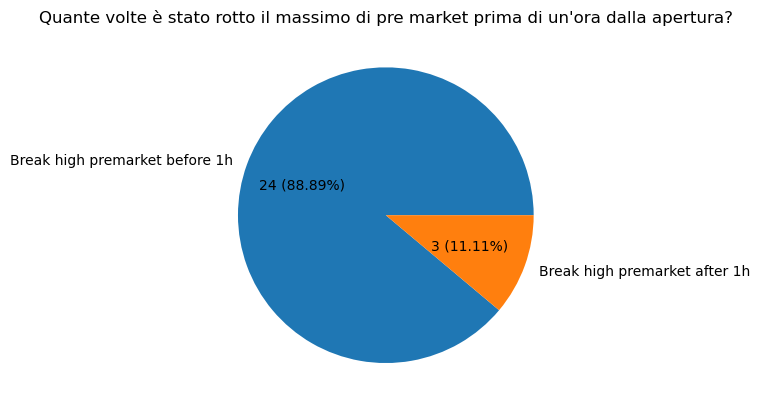

In [170]:
labels = ['Break high premarket before 1h', 'Break high premarket after 1h']
values = [count_break1h, count-count_break1h]
plt.pie(values, labels=labels,autopct=make_autopct(values))
plt.title("Quante volte è stato rotto il massimo di pre market prima di un'ora dalla apertura?")

# Ultima domanda

Tra tutte le volte che è stato rotto il massimo di pre market entro un'ora dall'apertura, quante volte ha chiuso sotto l'open?

In [208]:
start_date = "2023-01-01"
end_date = "2023-09-06"
count_red = 0
for ticker in ticker_break1h:
    ticker_df = yf.download(ticker,start = start_date, end = end_date)
    ticker_df1h = yf.download(ticker,start = start_date, end = end_date, interval='1h')
    volume_pm = ticker_df1h.groupby(ticker_df1h.index.date).first()['Volume']
    ticker_df['Gap'] = ((ticker_df['Open'] - ticker_df['Close'].shift(1)) / ticker_df['Close'].shift(1))
    ticker_df['Volume_pm'] = volume_pm
    gap_cond = ticker_df['Gap'] >= 0.7
    volume_cond = ticker_df['Volume'] >= 25e6
    red_cond = ticker_df['Close'] < ticker_df['Open']
    volume_pm_cond = ticker_df['Volume_pm']>=5e6
    open_price_cond = ticker_df['Open'] >=3
    ticker_df_total = ticker_df[gap_cond & volume_cond & volume_pm_cond & open_price_cond]
    date = ticker_df_total.index.strftime("%Y-%m-%d").values
    ticker_df1m = yf.download(ticker,start = date[0], interval='1h',prepost=True)
    ticker_df1m_day = ticker_df1m[ticker_df1m.index.strftime("%Y-%m-%d").isin(date)]
    open_time = datetime.strptime('09:30:00', '%H:%M:%S')
    premarket_ticker = ticker_df1m_day[ticker_df1m_day.index.time<open_time.time()]
    high_pm = premarket_ticker.groupby(premarket_ticker.index.date)['High'].max()
    ticker_df_total['High_pm'] = high_pm
    high_1h = ticker_df1m_day[ticker_df1m_day.index.time==open_time.time()]['High'].values
    ticker_df_total['High_1h'] = high_1h
    if (ticker_df_total['High_1h'].values > ticker_df_total['High_pm'].values).sum() > 0:
        count_red = count_red + (ticker_df_total['Close'].values < ticker_df_total['Open'].values).sum()
    #aumentare count in questo modo mi permette di considerare anche il caso in cui per un ticker si sia verificata la dinamica più di una volta

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_pm'] = high_pm
C:\Users\Martin\AppData\Local\Temp\ipykernel_22584\2853001720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df_total['High_1h'] = high_1h


In [209]:
count_red

18

In [211]:
count_break1h

24

Text(0.5, 1.0, "Delle 24 volte che ha rotto il massimo di pre market nella prima ora, quante volte il prezzo ha chiuso sotto l'apertura?")

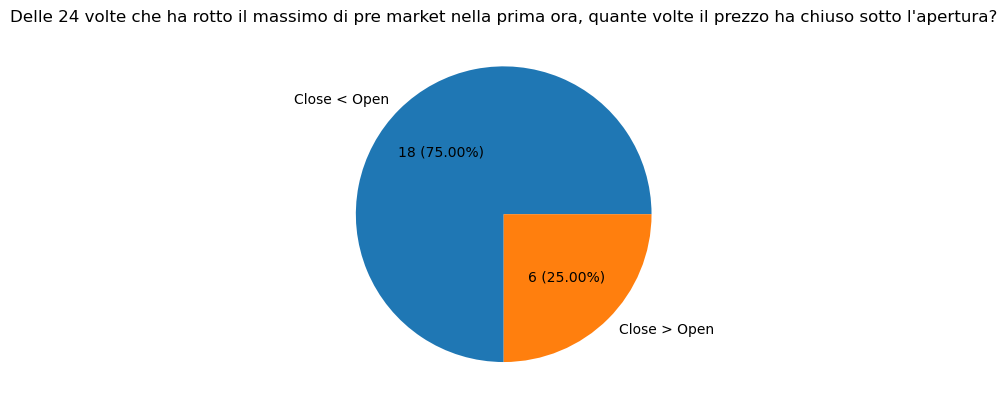

In [214]:
labels = ['Close < Open', 'Close > Open']
values = [count_red, count_break1h-count_red]
plt.pie(values, labels=labels,autopct=make_autopct(values))
plt.title("Delle 24 volte che ha rotto il massimo di pre market nella prima ora, quante volte il prezzo ha chiuso sotto l'apertura?")